In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers,models

In [4]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [5]:
img_width = 180
img_height = 180

In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [7]:
data_cat = data_train.class_names

In [8]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                       shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [ ]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                       shuffle=False,
                                                       validation_split=False)

Found 359 files belonging to 36 classes.


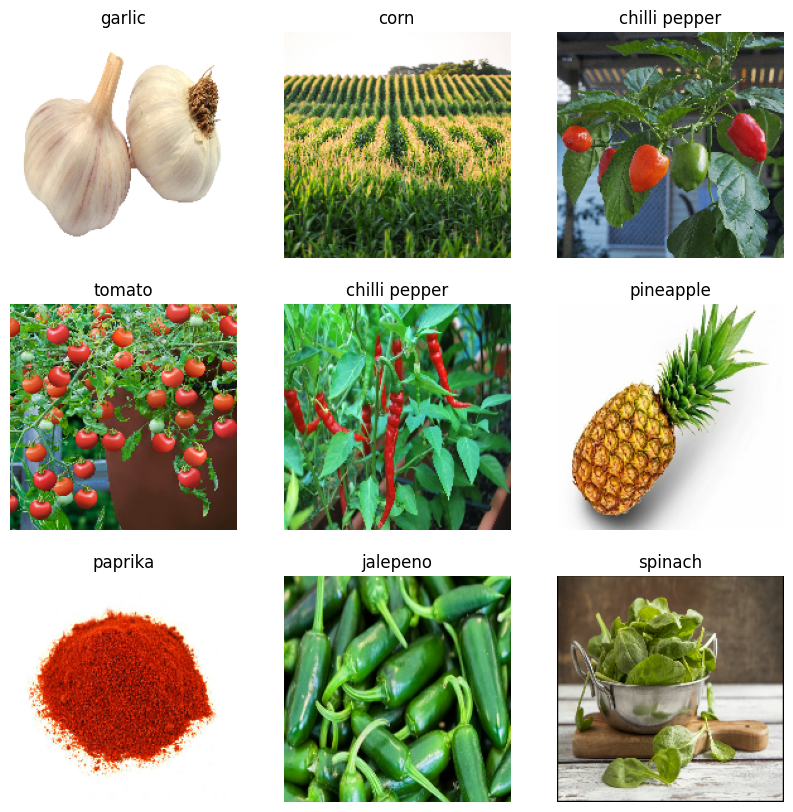

In [ ]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [ ]:
data_train

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model = models.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
epochs_size=25
history=model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 [==============================] - 73s 711ms/step - loss: 3.4380 - accuracy: 0.0848 - val_loss: 2.6004 - val_accuracy: 0.3077
Epoch 2/25
98/98 [==============================] - 54s 529ms/step - loss: 2.5889 - accuracy: 0.2610 - val_loss: 1.9107 - val_accuracy: 0.4786
Epoch 3/25
98/98 [==============================] - 55s 539ms/step - loss: 2.0925 - accuracy: 0.3894 - val_loss: 1.2441 - val_accuracy: 0.7123
Epoch 4/25
98/98 [==============================] - 67s 656ms/step - loss: 1.4561 - accuracy: 0.5746 - val_loss: 0.8721 - val_accuracy: 0.7949
Epoch 5/25
98/98 [==============================] - 62s 612ms/step - loss: 0.9402 - accuracy: 0.7284 - val_loss: 0.6481 - val_accuracy: 0.8832
Epoch 6/25
98/98 [==============================] - 62s 603ms/step - loss: 0.5962 - accuracy: 0.8276 - val_loss: 0.5281 - val_accuracy: 0.9145
Epoch 7/25
98/98 [==============================] - 66s 647ms/step - loss: 0.3658 - accuracy: 0.9011 - val_loss: 0.3350 - val_accuracy: 0.9430

Text(0.5, 1.0, 'Loss')

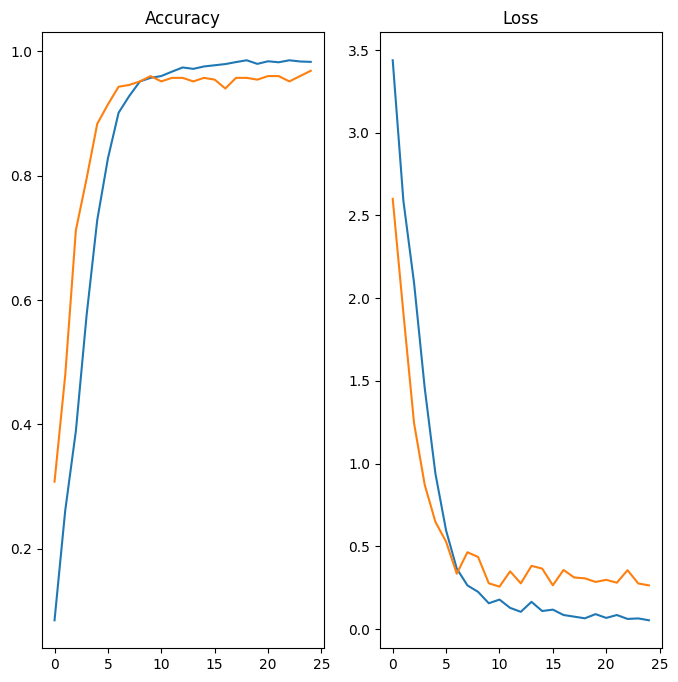

In [ ]:
epochs_range=range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.title('Loss')

In [ ]:
image = 'Potato.jpg'
image = tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.img_to_array(image)
img_bat=tf.expand_dims(img_arr,0)

In [ ]:
predict = model.predict(img_bat)
print(predict)

1/1 [==============================] - 0s 25ms/step
[[  2.6088243    3.2958574   -1.2152164   -0.36340624  -9.572601
    2.1846056   -1.417842     8.670239    -3.73832      8.300848
    0.67305493  -9.960255     4.2445893   10.5134      -6.6692133
   -3.1056015   -4.612118     4.267419   -12.513744    -1.4838026
    2.0618372    0.13545713  -1.325179     6.040858    -6.2746124
    2.7511318   -1.4924552   17.458973    -5.457694    10.61985
   -7.6233177    8.955545    14.74569     -2.1245613   -5.4734483
   -3.220279  ]]


In [ ]:
score = tf.nn.softmax(predict)
print(score)

tf.Tensor(
[[3.32470847e-07 6.60888929e-07 7.26096472e-09 1.70188450e-08
  1.70383618e-12 2.17529376e-07 5.92917715e-09 1.42624107e-04
  5.82403903e-10 9.85753359e-05 4.79799880e-08 1.15630422e-12
  1.70670035e-06 9.00880957e-04 3.10708889e-11 1.09650311e-09
  2.43073978e-10 1.74611239e-06 8.99716364e-14 5.55070789e-09
  1.92397877e-07 2.80275056e-08 6.50486376e-09 1.02864797e-05
  4.61026842e-11 3.83316234e-07 5.50289192e-09 9.35602486e-01
  1.04353956e-10 1.00207003e-03 1.19671556e-11 1.89714148e-04
  6.20479882e-02 2.92462721e-09 1.02722976e-10 9.77701031e-10]], shape=(1, 36), dtype=float32)


In [ ]:
print(f"Veg/Fruit in image is {data_cat[np.argmax(score)]} with accuracy of {np.max(score)*100:.2f}%")

Veg/Fruit in image is potato with accuracy of 93.56%
